# Food Prices in Myanmar - Exploratory Data Analysis

### Description of the data 


The dataset used throughout this notebook is from <a href = "https://data.humdata.org/dataset/wfp-food-prices-for-myanmar">The Humanatarian Data Exchange</a>. In the dataset, it contains various fields such as the date of the data taken and coordinates of the market to locate more accurately, etc. There are total of 34888 rows and 16 fields. 

#### Importing and initializing the libraries

In [1]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as pplt
import matplotlib.ticker as tckr

%matplotlib inline 
sns.set_style(style='ticks')

#### Loading the dataset

In [2]:
dF = pd.read_csv('datasets/wfp_food_prices_mmr.csv', encoding= 'latin-1')
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34888 entries, 0 to 34887
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          34888 non-null  object 
 1   admin1        34888 non-null  object 
 2   admin2        34888 non-null  object 
 3   market        34888 non-null  object 
 4   market_id     34888 non-null  int64  
 5   latitude      34888 non-null  float64
 6   longitude     34888 non-null  float64
 7   category      34888 non-null  object 
 8   commodity     34888 non-null  object 
 9   commodity_id  34888 non-null  int64  
 10  unit          34888 non-null  object 
 11  priceflag     34888 non-null  object 
 12  pricetype     34888 non-null  object 
 13  currency      34888 non-null  object 
 14  price         34888 non-null  float64
 15  usdprice      34888 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 4.3+ MB


> The field "admin1" denotes the name of the state/division of Myanmar.  
The field "admin2" denotes the name of the city in Myanmar.         
    
> Other than these, the remaining field names are pretty coherent and clear.

### Exploratory Data Analysis

#### Research Questions
Question 1 : How does the retail prices of essential foods changes overtime?   
Question 2 : Are impoverished people's struggle for basic food increasing?  

#### Data Cleaning

Since some of the field names are ambiguous, we are going to change the column names.

In [3]:
dF.rename(columns={'admin1' : 'region', 'admin2' : 'city'}, inplace=True) 
dF.head(5) #shows first 5 records in the data

,date,region,city,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2008,Kachin,Myitkyina,Wai Maw,1021,25.34,97.44,"meat, fish and eggs",Meat (chicken),94,KG,actual,Retail,MMK,3636.36,3.74
1,1/15/2008,Kachin,Myitkyina,Wai Maw,1021,25.34,97.44,vegetables and fruits,Onions,173,KG,actual,Retail,MMK,969.70,1.00
2,1/15/2008,Kachin,Myitkyina,Wai Maw,1021,25.34,97.44,vegetables and fruits,Tomatoes,114,KG,actual,Retail,MMK,484.85,0.50
3,1/15/2008,Magway,Magway,Magway,997,20.15,94.92,cereals and tubers,Potatoes,83,KG,actual,Retail,MMK,242.42,0.25
4,1/15/2008,Magway,Magway,Magway,997,20.15,94.92,cereals and tubers,Rice (low quality),145,KG,actual,Retail,MMK,604.17,0.62


> Just like that, all of the field names are now clear. 

In [4]:
dF.isnull().sum()

date            0
region          0
city            0
market          0
market_id       0
latitude        0
longitude       0
category        0
commodity       0
commodity_id    0
unit            0
priceflag       0
pricetype       0
currency        0
price           0
usdprice        0
dtype: int64

In [5]:
dF.duplicated().sum()

0

> The data has no null values as well as duplicated records.  
However, we are doing EDA on retail prices of various foods in Myanmar. So, we need to filter the data.

In [6]:
iDrop = dF.loc[dF.pricetype != 'Retail'].index ## gives the index of the rows that is not retail price
iDrop

Index([ 3066,  3239,  3397,  3710,  3790,  3870,  3953,  4022,  4268,  4463,
        4734,  4806,  4954,  5018,  5114,  5475,  5527,  5570,  5663,  5766,
        5861,  6010,  6149,  6293,  6421,  6554,  6834,  6979,  7270,  7410,
        7806,  7942,  8187,  8305,  8406,  8529,  8650,  8763,  8892,  9030,
        9145,  9261,  9476,  9599,  9810,  9919, 10127, 10244, 10327, 10437,
       10655, 10762, 10851, 11107, 11187, 11514, 11595, 11669, 11857, 11896,
       11938, 12096, 12195, 12357, 12453, 12550, 12596, 12652, 12696, 12743,
       12791],
      dtype='int64')

In [7]:
dF.drop(iDrop)
dF.head(5)

,date,region,city,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2008,Kachin,Myitkyina,Wai Maw,1021,25.34,97.44,"meat, fish and eggs",Meat (chicken),94,KG,actual,Retail,MMK,3636.36,3.74
1,1/15/2008,Kachin,Myitkyina,Wai Maw,1021,25.34,97.44,vegetables and fruits,Onions,173,KG,actual,Retail,MMK,969.70,1.00
2,1/15/2008,Kachin,Myitkyina,Wai Maw,1021,25.34,97.44,vegetables and fruits,Tomatoes,114,KG,actual,Retail,MMK,484.85,0.50
3,1/15/2008,Magway,Magway,Magway,997,20.15,94.92,cereals and tubers,Potatoes,83,KG,actual,Retail,MMK,242.42,0.25
4,1/15/2008,Magway,Magway,Magway,997,20.15,94.92,cereals and tubers,Rice (low quality),145,KG,actual,Retail,MMK,604.17,0.62


>   Now we have the only rows with retail price.

#### Data Processing & Visualisation

After obtaining the clean data, we have to filter the data for further visualisations to deliver accruate insights.  

> To answer question 1, we first need to filter the essential foods such as rice and oil.

In [8]:
q1 = dF.loc[dF.commodity.isin(['Rice (low quality)', 'Oil (palm)'])]
## this filters out the rows that has essential food items in the dataframe
q1.tail(3) 

,date,region,city,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
34876,2/15/2025,Yangon,Yangon (East),Zamyinzwel,6091,16.91,96.16,oil and fats,Oil (palm),62,L,actual,Retail,MMK,4495.70,2.15
34879,2/15/2025,Yangon,Yangon (North),Meegwet,6089,16.87,96.05,cereals and tubers,Rice (low quality),145,KG,actual,Retail,MMK,2230.16,1.07
34881,2/15/2025,Yangon,Yangon (North),Meegwet,6089,16.87,96.05,oil and fats,Oil (palm),62,L,actual,Retail,MMK,7595.41,3.63


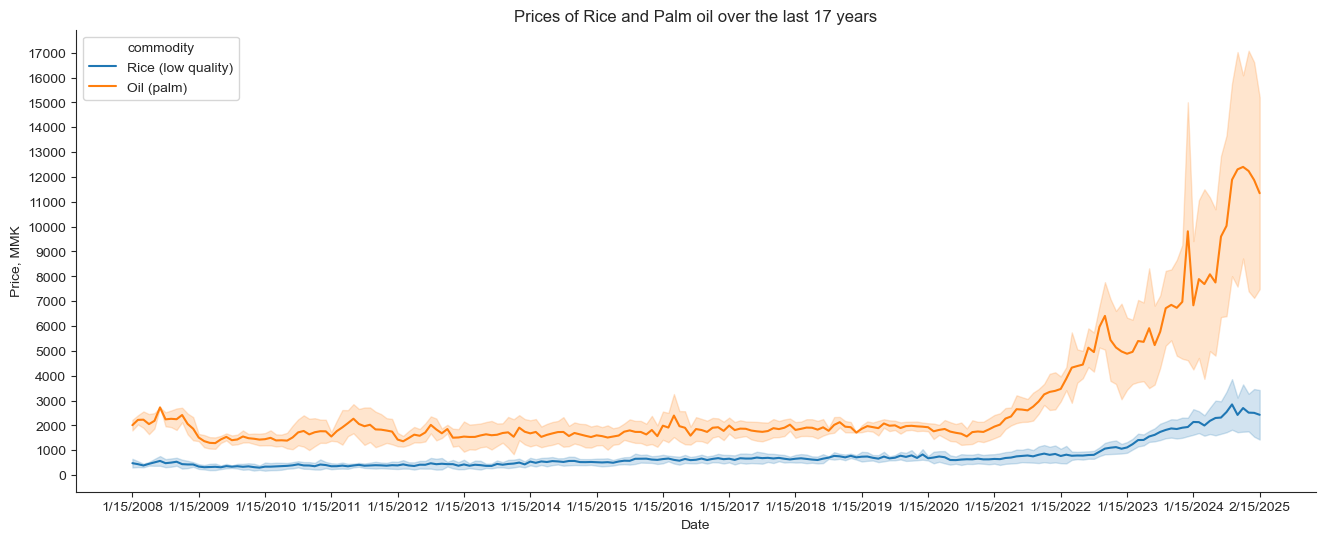

In [9]:
f, axs = pplt.subplots(figsize = (16, 6))
sns.lineplot(x = 'date', y = 'price', hue = 'commodity', data = q1, errorbar='sd')
axs.xaxis.set_major_locator(tckr.MultipleLocator(12))
pplt.xlabel('Date')
pplt.ylabel('Price, MMK')
pplt.title('Prices of Rice and Palm oil over the last 17 years')
axs.yaxis.set_major_locator(tckr.MultipleLocator(1000))
sns.despine()
pplt.show()


> Before the 2020 global pandemic, the prices of essential food items had very little price changes, especially the price of the rice.  
After the global pandemic, Myanmar's economy seems to be still in shambles as prices went up dramatically during the last 5 years.

In [10]:
dF['region'].value_counts().head(5)

region
Rakhine         7870
Shan (North)    6807
Kachin          5723
Chin            3716
Magway          2625
Name: count, dtype: int64

In [11]:
q2 = dF.loc[(dF.region == 'Rakhine') & (dF.commodity == 'Rice (low quality)')]
# we are just gonna filter the dataset by rakhine regoin as the dataset has so much record about it 
# Since rice is a big staple in Asia, we will focus on prices of rice and find the average exchange rate for each year in the dataset.

exc = q2.price/q2.usdprice
q2 = q2.assign(exchange = exc, year = q2.date.apply(lambda x : x[-4:]))

data = pd.DataFrame({'year': pd.Categorical(q2.year).categories, 'avg_exchange': q2.exchange.groupby(q2.year).mean()})
data

,year,avg_exchange
year,,
2008,2008,973.905167
2009,2009,964.267459
2010,2010,962.315150
2011,2011,965.663427
2012,2012,966.575485
2013,2013,966.379287
2014,2014,981.919763
2015,2015,1160.334175
2016,2016,1226.277055


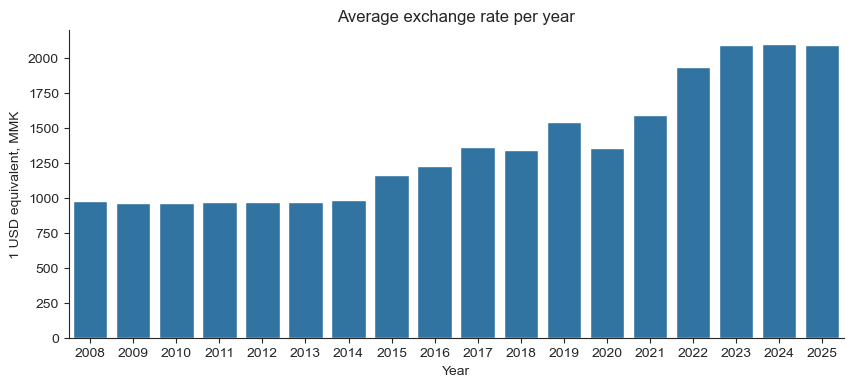

In [12]:
f, axs = pplt.subplots(figsize = (10, 4))

sns.barplot(x = 'year', y = 'avg_exchange', data = data)
pplt.ylabel('1 USD equivalent, MMK')
pplt.xlabel('Year')
pplt.title('Average exchange rate per year')
sns.despine()
pplt.show()

> Starting from 2015, exchange rate was slowly increasing and it chaotically increased starting from 2021.

### Insights

- The data mainly focuses on less developed state/division of Myanmar such as Rakhine, Kachin and Chin.
- The prices of palm oil has a percentage change of 400% over the last 5 years.
- The average exchange rate in 2024 has increased by 60% compared to average exchange rate in 2020. This means that people will have to struggle for food as people are more 60% poorer due to depreciated value of MMK.
- Since the prices of necessary food items are increasing, there will be malnutrition among children and women of disadvantaged communities of Myanmar which can lead to slower development in children.
- More food schemes should be implemented to solve this food crisis in Myanmar.